## SHAP Values

## How They Work

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [1]:
# For this example, we'll reuse the model you've already seen with the Soccer data.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/FIFA-2018-Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

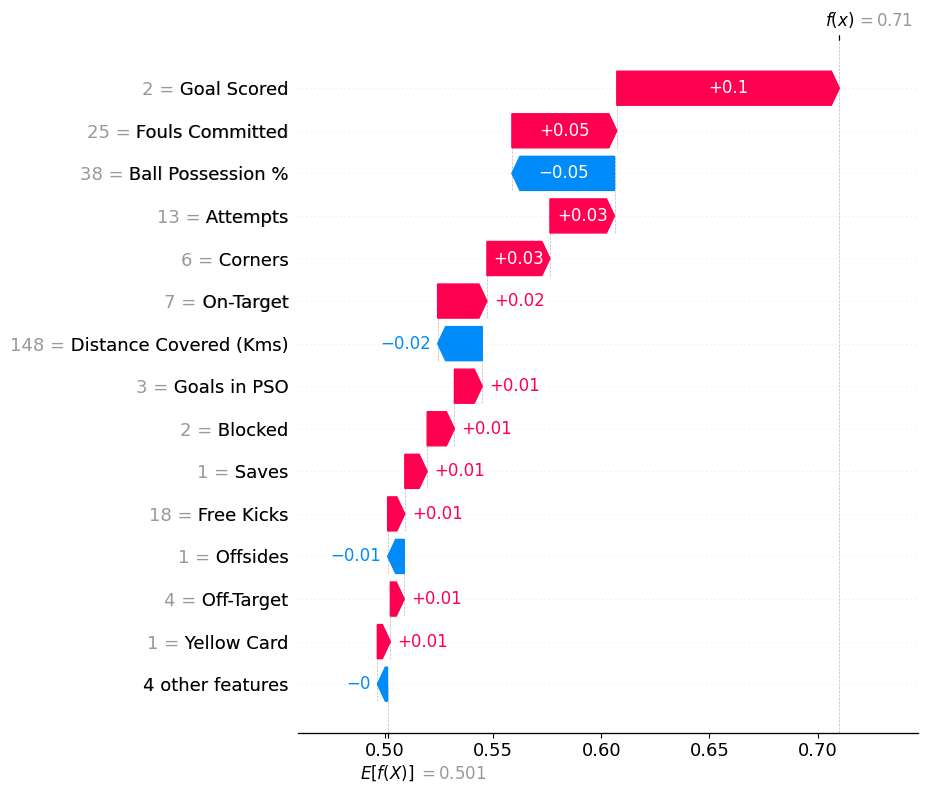

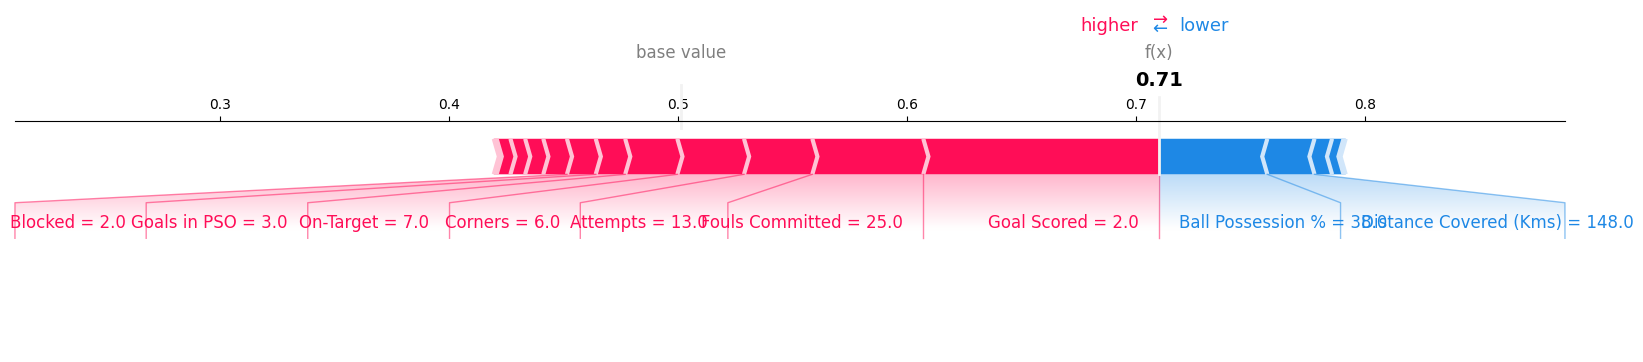

In [2]:
# --- Just works with multi-output SHAP (pick class 1) ---
import numpy as np
import shap

row_to_show = 5
row_df = val_X.iloc[[row_to_show]]

explainer = shap.TreeExplainer(my_model)
sv = explainer(row_df, check_additivity=False)   # Explanation

# For a single sample, sv[0] has shape (n_features, n_outputs)
# Select the positive class (index 1). If there is only one output, fall back.
try:
    sv_pos = sv[0][:, 1]   # 1-D Explanation across features for class 1
except Exception:
    sv_pos = sv[0]         # single-output case

# Waterfall (most robust)
shap.plots.waterfall(sv_pos, max_display=15)

# If you want a force plot too (3-arg signature)
base  = float(np.ravel(sv_pos.base_values)[0])
vals  = np.asarray(sv_pos.values, dtype=float)     # 1-D vector (n_features,)
feats = row_df.iloc[0]                             # 1-D Series

shap.force_plot(base, vals, feats, matplotlib=True, show=True)




# SHAP Interpretation

The model predicted a **71% probability** that the player wins *Man of the Match*.  

### Key drivers:
- 🔺 Positive impact: `Goal Scored (+0.10)`, `Fouls Committed (+0.05)`, `Attempts (+0.03)`, `Corners (+0.03)`  
- 🔻 Negative impact: `Ball Possession % (−0.05)`, `Distance Covered (Kms) (−0.02)`  

### Visualizations:
- **Waterfall plot**: shows how features shift the prediction from the base value (~0.50) to 0.71.  
- **Force plot**: red features push probability higher, blue features push it lower.  